# Exploratory Data Analysis

This notebook will contain the EDA and Cleaning steps of the **S&P 500** dataset.
EDA will first be conducted on a subset of the available to have a preliminary troubleshooting strategy which will later be refined and applied to the entirity of the dataset.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import glob
import os
import tarfile
from wrangling_helpers import *

## Preliminary EDA : Agilent Data+ Advance Auto parts

In [40]:
%%time
import tarfile
with tarfile.open("C:/Users/Kamal/OneDrive/Documents/GitHub/Financial-Big-Data/SP500_2010/SP500_2010/bbo/A_05.tar","r") as tar_bbo:
    tar_bbo.extractall("bbo_A")

<timed exec>:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.


CPU times: total: 62.5 ms
Wall time: 279 ms


In [41]:
%%time
import tarfile
with tarfile.open("C:/Users/Kamal/OneDrive/Documents/GitHub/Financial-Big-Data/SP500_2010/SP500_2010/trade/A_05.tar","r") as tar_bbo:
    tar_bbo.extractall("trade_A")

CPU times: total: 15.6 ms
Wall time: 79 ms


<timed exec>:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.


### Pandas vs Polars

In [42]:
%%time
df_A_bbo_pol=pl.read_parquet("bbo_A")
df_A_bbo_pol.head()

CPU times: total: 46.9 ms
Wall time: 164 ms


xltime,bid-price,bid-volume,ask-price,ask-volume
f64,f64,i32,f64,i32
40301.418062,0.0,0,0.0,0
40301.465982,0.0,0,36.62,3
40301.477885,35.51,1,36.62,3
40301.47986,36.26,1,36.62,3
40301.484052,36.26,2,36.62,3


In [43]:
%%time
df_A_trade_pol=pl.read_parquet("trade_A")
df_A_trade_pol.head()

CPU times: total: 0 ns
Wall time: 51.5 ms


xltime,trade-price,trade-volume,trade-stringflag,trade-rawflag
f64,f64,i32,str,str
40301.502575,36.62,100,"""marketclosed|volumeupdate""","""[CTS_QUAL ] …"
40301.503468,36.62,100,"""marketclosed|volumeupdate""","""[CTS_QUAL ] …"
40301.505594,36.62,100,"""marketclosed|volumeupdate""","""[CTS_QUAL ] …"
40301.561477,36.26,14100,"""blocktrade|marketclosed|volume…","""[CTS_QUAL ] …"
40301.561477,36.26,14100,"""blocktrade|marketclosed|volume…","""[CTS_QUAL ] …"


In [44]:
%%time

df_A_bbo_pd=pd.read_parquet("bbo_A")
df_A_bbo_pd.head()

CPU times: total: 109 ms
Wall time: 683 ms


,xltime,bid-price,bid-volume,ask-price,ask-volume
0,40301.418062,0.00,0,0.00,0
1,40301.465982,0.00,0,36.62,3
2,40301.477885,35.51,1,36.62,3
3,40301.479860,36.26,1,36.62,3
4,40301.484052,36.26,2,36.62,3


In [45]:
%%time

df_A_trade_pd=pd.read_parquet("trade_A")
df_A_trade_pd.head()

CPU times: total: 46.9 ms
Wall time: 192 ms


,xltime,trade-price,trade-volume,trade-stringflag,trade-rawflag
0,40301.502575,36.62,100,marketclosed|volumeupdate,[CTS_QUAL ] ...
1,40301.503468,36.62,100,marketclosed|volumeupdate,[CTS_QUAL ] ...
2,40301.505594,36.62,100,marketclosed|volumeupdate,[CTS_QUAL ] ...
3,40301.561477,36.26,14100,blocktrade|marketclosed|volumeupdate,[CTS_QUAL ] ...
4,40301.561477,36.26,14100,blocktrade|marketclosed|volumeupdate,[CTS_QUAL ] ...


Choose polars: faster runtime

### DF Description


In [6]:
df_A_bbo_pol.describe()

statistic,xltime,bid-price,bid-volume,ask-price,ask-volume
str,f64,f64,f64,f64,f64
"""count""",2.659219e6,2.659219e6,2.659219e6,2.659219e6,2.659219e6
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",40314.328536,32.828647,7.856365,32.845844,7.815876
"""std""",7.624977,1.431329,18.364603,2.805064,10.566341
"""min""",40301.418062,0.0,0.0,0.0,0.0
"""25%""",40305.806678,31.67,2.0,31.68,2.0
"""50%""",40315.774256,32.51,5.0,32.52,5.0
"""75%""",40319.731234,33.94,10.0,33.96,10.0
"""max""",40326.999875,36.89,1536.0,2000.0,738.0


In [7]:
df_A_trade_pol.describe()

statistic,xltime,trade-price,trade-volume,trade-stringflag,trade-rawflag
str,f64,f64,f64,str,str
"""count""",496894.0,496894.0,496894.0,"""496894""","""496894"""
"""null_count""",0.0,0.0,0.0,"""0""","""0"""
"""mean""",40313.929406,32.98408,179.530423,null,null
"""std""",7.358222,1.449375,1283.050984,null,null
"""min""",40301.502575,29.97,100.0,"""auction""","""[CTS_QUAL ] …"
"""25%""",40305.810619,31.88,100.0,null,null
"""50%""",40315.737708,32.65,100.0,null,null
"""75%""",40319.56301,34.09,100.0,null,null
"""max""",40326.874064,36.89,452200.0,"""volumeupdate""","""[CTS_QUAL ]XTR …"


### Correct Datetime and Formatting

Using pandas : **TIME COSTLY**

In [46]:
%%time
df_A_trade_pd['date']=pd.to_datetime(df_A_bbo_pd['xltime'],origin='1899-12-30',unit='D')
df_A_trade_pd.set_index('date').head()

CPU times: total: 672 ms
Wall time: 1.54 s


,xltime,trade-price,trade-volume,trade-stringflag,trade-rawflag
date,,,,,
2010-05-03 10:02:00.548000004,40301.502575,36.62,100,marketclosed|volumeupdate,[CTS_QUAL ] ...
2010-05-03 11:11:00.873999960,40301.503468,36.62,100,marketclosed|volumeupdate,[CTS_QUAL ] ...
2010-05-03 11:28:09.295000276,40301.505594,36.62,100,marketclosed|volumeupdate,[CTS_QUAL ] ...
2010-05-03 11:30:59.920999709,40301.561477,36.26,14100,blocktrade|marketclosed|volumeupdate,[CTS_QUAL ] ...
2010-05-03 11:37:02.093999430,40301.561477,36.26,14100,blocktrade|marketclosed|volumeupdate,[CTS_QUAL ] ...


Using polars (loading functions defined in **wrangling_helpers.py**)

In [47]:
%%time
df_AAP_trade=load_trade_file("AAP_05")
df_AAP_bbo=load_bbo_file("AAP_05")

CPU times: total: 31.2 ms
Wall time: 144 ms


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:163: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fin

In [3]:
df_AAP_trade_odd_time=load_trade_file("AAP_05",only_regular_trading_hours=False)


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema


### Comparing opening times

In [34]:
trade_ref=load_trade_file('AAP_05').collect()

c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema


In [35]:
trade_odd=load_trade_file('AAP_05',only_regular_trading_hours=False).collect()

c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema


In [36]:
odd_times = (
        trade_odd['index'].dt.strftime('%H:%M')
    )  
odd_times_sorted = sorted(odd_times)
reg_times = (
        trade_ref['index'].dt.strftime('%H:%M')
    )  
reg_times_sorted = sorted(reg_times)


In [37]:
len(odd_times)

169627

In [38]:
len(reg_times)

169622

Text(0.5, 1.0, 'Distribution of Timestamp Raw VS Cleaned')

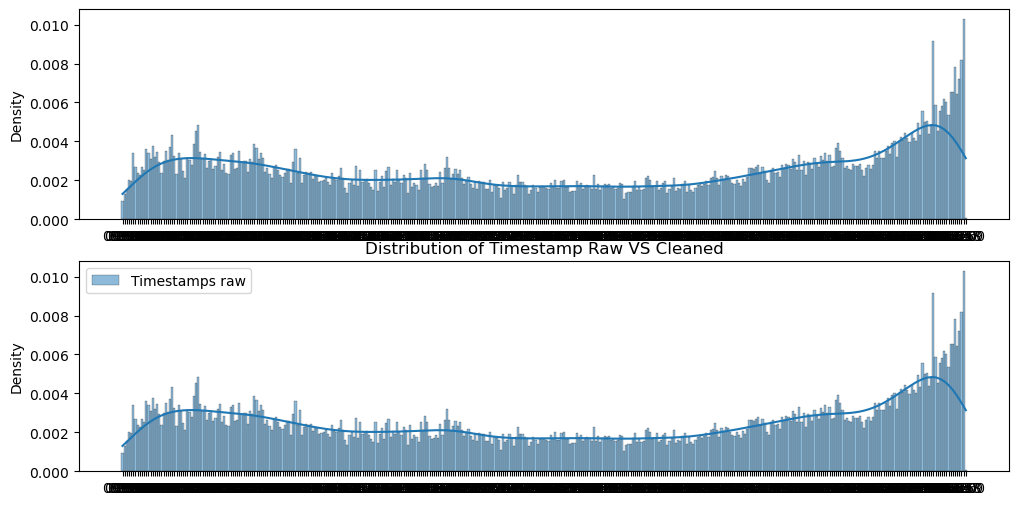

In [9]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
sns.histplot(reg_times_sorted,kde=True,label='Timestamps clean',stat='density',ax=axs[0])
sns.histplot(odd_times_sorted,kde=True,label='Timestamps raw',stat='density',ax=axs[1])
plt.legend()
plt.title('Distribution of Timestamp Raw VS Cleaned')

### Constructing full dataset

In [6]:
df_AAP_trade.collect()

index,trade-price,trade-volume
"datetime[μs, America/New_York]",f64,i32
2010-05-03 09:30:00.638 EDT,45.13,200
2010-05-03 09:30:03.871 EDT,45.21,100
2010-05-03 09:30:06.277 EDT,45.2,100
2010-05-03 09:30:06.289 EDT,45.316,500
2010-05-03 09:30:10.254 EDT,45.21,100
…,…,…
2010-05-28 15:59:59.247 EDT,51.75,1300
2010-05-28 16:00:00.166 EDT,51.78,100
2010-05-28 16:00:00.225 EDT,51.79,100


In [7]:
%%time
events=df_AAP_bbo.join(df_AAP_trade,how='full',on='index',coalesce=True).sort('index')

null_counts=events.select([pl.col(col).is_null().sum().alias(col) for col in events.columns])

CPU times: total: 0 ns
Wall time: 2 ms


<timed exec>:3: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.


In [8]:
null_counts.collect()

index,bid-price,bid-volume,ask-price,ask-volume,trade-price,trade-volume
u32,u32,u32,u32,u32,u32,u32
0,103825,103825,103825,103825,462635,462635


Loads of null values coming from the full fill of the data.

C:\Users\Kamal\AppData\Local\Temp\ipykernel_34924\3256021240.py:2: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  plt.bar(x=null_counts.columns[1:],height=[_ for _ in null_counts.collect().row(0)][1:])


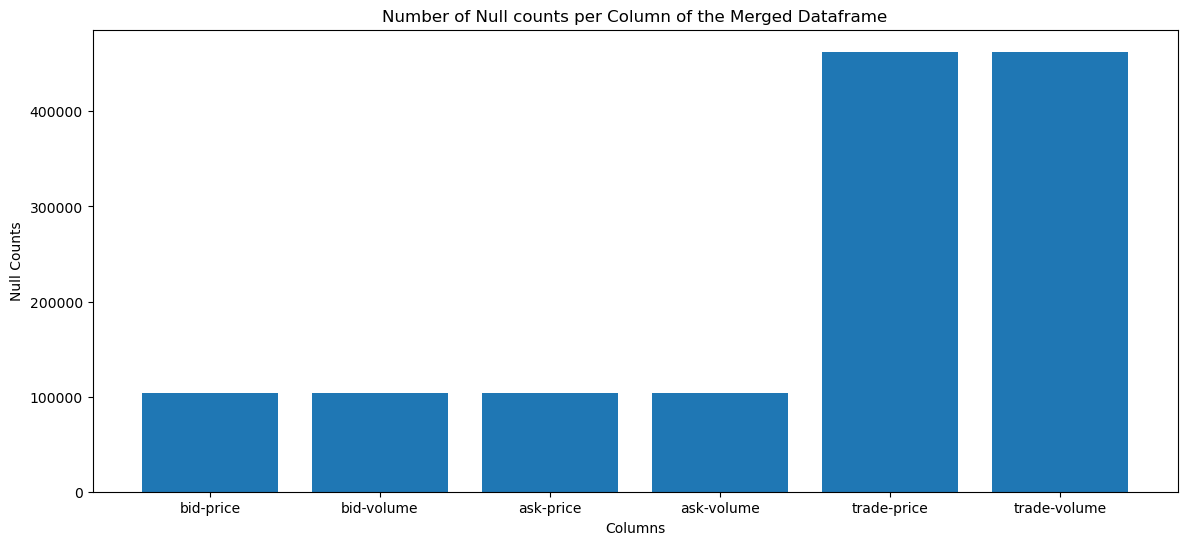

In [9]:
plt.figure(figsize=(14,6))
plt.bar(x=null_counts.columns[1:],height=[_ for _ in null_counts.collect().row(0)][1:])
plt.xlabel('Columns')
plt.ylabel('Null Counts')
plt.title('Number of Null counts per Column of the Merged Dataframe')
plt.show()

Let's fill foward the bid and ask volumes and prices with respect to date, and drop all the null values to drop the quotes during the date since we need to calculate the mid-price later on.

In [10]:
events_cleaned = events.with_columns(pl.col('index').dt.date().alias('date'))
events_cleaned = events_cleaned.with_columns([pl.col('bid-price').forward_fill().over('date'),
                              pl.col('bid-volume').forward_fill().over('date'),
                              pl.col('ask-price').forward_fill().over('date'),
                              pl.col('ask-volume').forward_fill().over('date')])
events_cleaned = events.drop_nulls()   



In [11]:
null_counts_clean=events_cleaned.select([pl.col(col).is_null().sum().alias(col) for col in events_cleaned.columns])

C:\Users\Kamal\AppData\Local\Temp\ipykernel_34924\27894313.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  null_counts_clean=events_cleaned.select([pl.col(col).is_null().sum().alias(col) for col in events_cleaned.columns])


In [12]:
null_counts_clean.collect()

index,bid-price,bid-volume,ask-price,ask-volume,trade-price,trade-volume
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


### Computing the returns

In [13]:
events_cleaned.collect().limit(5)

index,bid-price,bid-volume,ask-price,ask-volume,trade-price,trade-volume
"datetime[μs, America/New_York]",f64,i32,f64,i32,f64,i32
2010-05-03 09:30:06.277 EDT,45.19,4,45.36,2,45.2,100
2010-05-03 09:30:06.289 EDT,45.19,6,45.36,2,45.316,500
2010-05-03 09:30:10.254 EDT,45.21,1,45.34,2,45.21,100
2010-05-03 09:31:48.936 EDT,45.26,3,45.34,1,45.27,100
2010-05-03 09:32:24.197999 EDT,45.2,4,45.28,4,45.261818,1100


In [14]:
mid_prices=events_cleaned.with_columns(((pl.col('bid-price')+pl.col('ask-price')) /2).alias('mid-price'))
mid_prices.collect().limit(5)

index,bid-price,bid-volume,ask-price,ask-volume,trade-price,trade-volume,mid-price
"datetime[μs, America/New_York]",f64,i32,f64,i32,f64,i32,f64
2010-05-03 09:30:06.277 EDT,45.19,4,45.36,2,45.2,100,45.275
2010-05-03 09:30:06.289 EDT,45.19,6,45.36,2,45.316,500,45.275
2010-05-03 09:30:10.254 EDT,45.21,1,45.34,2,45.21,100,45.275
2010-05-03 09:31:48.936 EDT,45.26,3,45.34,1,45.27,100,45.3
2010-05-03 09:32:24.197999 EDT,45.2,4,45.28,4,45.261818,1100,45.24


In [15]:
import numpy as np
log_returns=mid_prices.with_columns((np.log(pl.col('mid-price').shift(1)/pl.col('mid-price')))
                                    .cast(pl.Float64)
                                    .alias('log_mid'))
log_returns=log_returns.with_columns((np.log(pl.col('trade-price').shift(1)/pl.col('trade-price')))
                                     .cast(pl.Float64)
                                     .alias('log_trade'))
log_returns=log_returns.drop_nulls()


In [16]:
log_returns.collect().limit(5)

c:\Users\Kamal\miniconda3\envs\Fin_Big_Data\Lib\site-packages\polars\series\series.py:1464: RuntimeWarning: divide by zero encountered in log
  lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs),


index,bid-price,bid-volume,ask-price,ask-volume,trade-price,trade-volume,mid-price,log_mid,log_trade
"datetime[μs, America/New_York]",f64,i32,f64,i32,f64,i32,f64,f64,f64
2010-05-03 09:30:06.289 EDT,45.19,6,45.36,2,45.316,500,45.275,0.0,-0.002563
2010-05-03 09:30:10.254 EDT,45.21,1,45.34,2,45.21,100,45.275,-1.1102e-16,0.002342
2010-05-03 09:31:48.936 EDT,45.26,3,45.34,1,45.27,100,45.3,-0.000552,-0.001326
2010-05-03 09:32:24.197999 EDT,45.2,4,45.28,4,45.261818,1100,45.24,0.001325,0.000181
2010-05-03 09:32:24.205999 EDT,45.2,6,45.33,2,45.208333,1200,45.265,-0.000552,0.001182


Proceed with a statistical test to determine the difference between the two types of return

In [17]:
from scipy import stats
_,p_value=stats.ttest_ind(log_returns.select(pl.col('log_mid')).drop_nulls().collect(),
                          log_returns.select(pl.col('log_trade')).drop_nulls().collect())
print(f'P_value: {p_value}')

P_value: [0.99455618]


Given a p value> 99% we there's not enough statistical evidence to reject the null hypothesis which states that the bbo log returns and the trade log returns are different.

Let's use the trade log returns for out study since they reflect the price at which the stock was actually sold.

### Dtype sanity check

A first EDA on Agilent stock exclusively, lead to an overlook of the data type formatting. When constructing the pipeline, data type inconsistencies started to emerge for different stocks. Hence the need to go through EDA again to accomodate for the type mismatch. The approach adopted is to cast the columns to the most common data type in order to obtain a fuller dataset. Goes against the usual approach of ignoring inconsistent data.

In [19]:
log_returns.dtypes

C:\Users\Kamal\AppData\Local\Temp\ipykernel_34924\3459045359.py:1: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  log_returns.dtypes


[Datetime(time_unit='us', time_zone='America/New_York'),
 Float64,
 Int32,
 Float64,
 Int32,
 Float64,
 Int32,
 Float64,
 Float64,
 Float64]

### Returns plotting

In [20]:
agg_rets=log_returns.drop_nulls()

agg_rets = agg_rets.with_columns(
    pl.col("log_trade")
    .rolling_mean_by("index", window_size="1h")
    .alias("hourly_avg_log_trade"),
)

agg_rets = agg_rets.with_columns(
    pl.col("log_trade")
    .rolling_mean_by("index", window_size="1d")
    .alias("daily_avg_log_trade"),
)


In [21]:
agg_rets.select([pl.col('index'),pl.col('hourly_avg_log_trade'),pl.col('daily_avg_log_trade')]).collect().limit(5)

index,hourly_avg_log_trade,daily_avg_log_trade
"datetime[μs, America/New_York]",f64,f64
2010-05-03 09:30:06.289 EDT,-0.002563,-0.002563
2010-05-03 09:30:10.254 EDT,-0.000111,-0.000111
2010-05-03 09:31:48.936 EDT,-0.000516,-0.000516
2010-05-03 09:32:24.197999 EDT,-0.000342,-0.000342
2010-05-03 09:32:24.205999 EDT,-0.000037,-0.000037


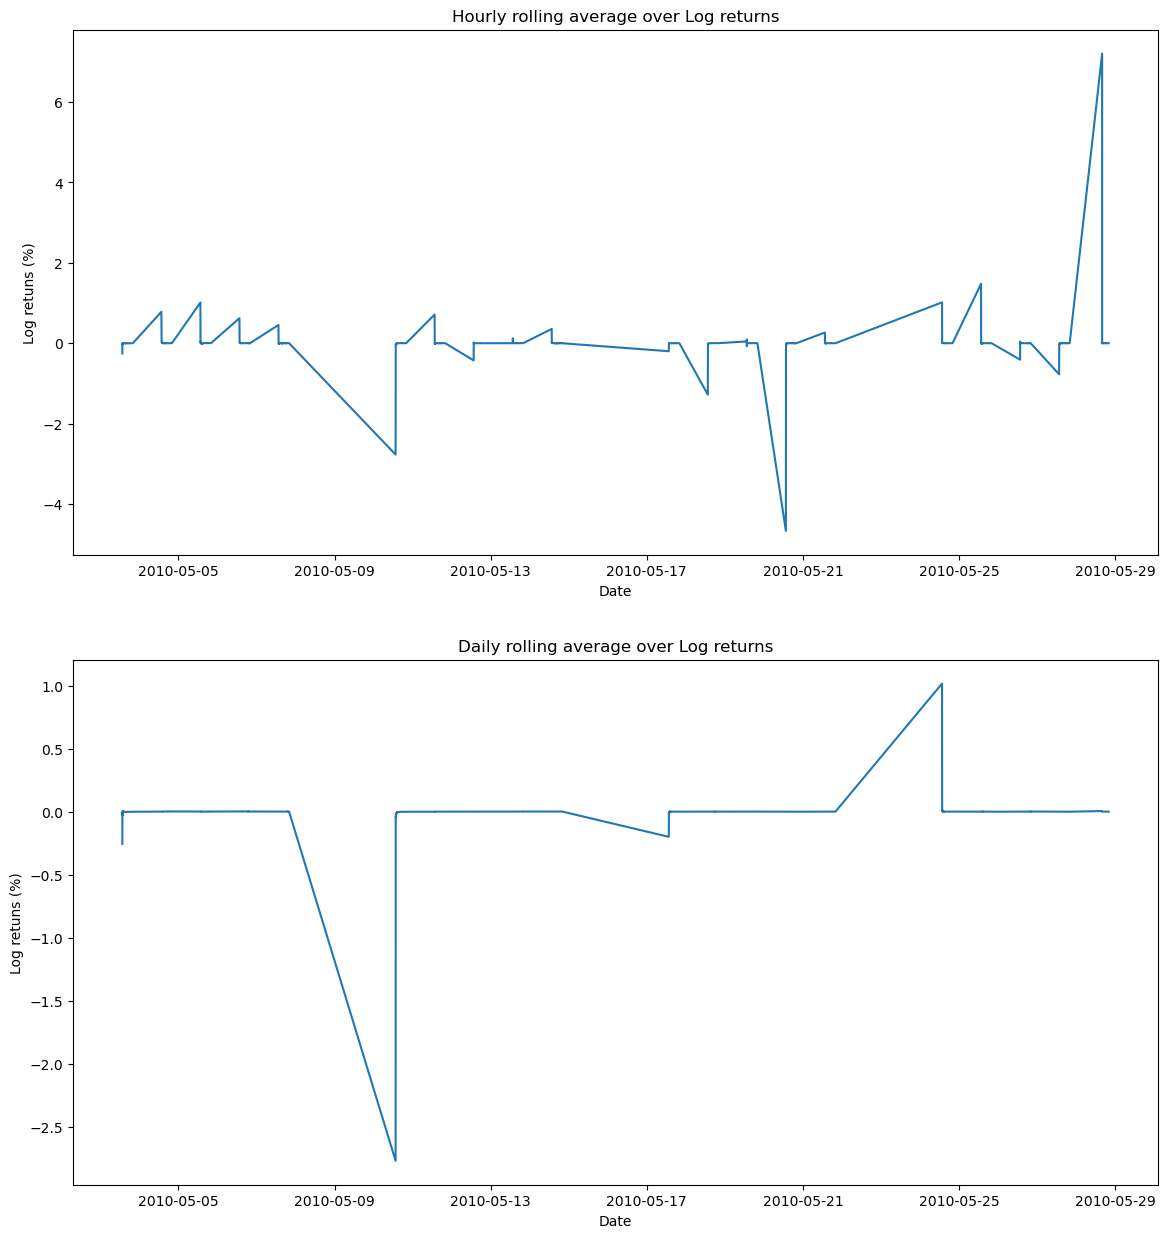

In [23]:
fig, axs=plt.subplots(2,1,figsize=(14,15))
metrics=['hourly_avg_log_trade','daily_avg_log_trade']
titles=['Hourly','Daily']
for i in range(len(axs)):
    axs[i].plot(agg_rets.select(pl.col('index')).collect(),agg_rets.select(pl.col(metrics[i])*100).collect())
    axs[i].set_title(f'{titles[i]} rolling average over Log returns')
    axs[i].set_ylabel('Log retuns (%)')
    axs[i].set_xlabel('Date')
plt.show()



### Awaited result for AAP Data

In [25]:
aap_res=log_returns.select(pl.col('index'),pl.col('log_trade').alias('AAP'))
aap_res.collect()

index,AAP
"datetime[μs, America/New_York]",f64
2010-05-03 09:30:06.289 EDT,-0.002563
2010-05-03 09:30:10.254 EDT,0.002342
2010-05-03 09:31:48.936 EDT,-0.001326
2010-05-03 09:32:24.197999 EDT,0.000181
2010-05-03 09:32:24.205999 EDT,0.001182
…,…
2010-05-28 15:59:48.085 EDT,0.0
2010-05-28 15:59:50.790 EDT,0.000193
2010-05-28 15:59:51.036 EDT,-0.000048


## Pipeline

Given the EDA task it becomes easier to form a compact pipeline for the log return matrix generation since we know which type of return to use (log in this case) and we've compacted the eda task in wrangling_helpers

We encounter a problem of granularity here: The stock data has very fine granularity (second-level timestamps).
When merging the data based on date, the timestamps are too specific, leading to no matches. Need to first reduce the row space to make it more general, allowing a more efficient merge that will increase the likelihood of obtaining a complete dataframe. 
Solution would be moving away from a rolling average to a regular arithmetic daily or hourly average. 
Reducing the granularity of this average can be considered once the pipeline is done.

In [48]:
def log_return_matrix(SnP_dir, chunk_size=50, output_dir="log returns",
                      tar_filename="log_returns.tar", aggregation_window='1h'):
    """
    Calculates the log return matrix for a subset of tickers from trade data files.

    This function processes trade data for the stocks in a given directory (`SnP_dir`), calculates
    log returns based on trade prices, and creates a matrix where each column corresponds to the log return of
    a specific ticker. The resulting data is aggregated to a specified time granularity (default: hourly),
    with missing data (nulls) dropped, and then joined on a common timestamp index.

    Args:
        SnP_dir (str): The directory path containing the `trade` subfolder, which holds the trade data files 
                       for different tickers in `.tar` format. These files are expected to contain at least 
                       a `trade-price` column and a `timestamp` index.
        chunk_size (int): Number of tickers to process in each chunk (default: 50).
        output_dir (str): Directory to save intermediate Parquet files (default: "log returns").
        tar_filename (str): Name of the compressed output file (default: "log_returns.tar").
        aggregation_window (str): Time window for aggregation (default: '1h').

    Returns:
        None
    """

    # Ensure the output directory exists, creating it if necessary
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")
      
    # Extract the list of tickers from the trade directory
    tickers = [tick.split('.tar')[0] for tick in os.listdir(SnP_dir + "/trade")]

    # Process tickers in chunks
    for i in range(0, len(tickers), chunk_size):
        res = None  # Initialize an empty result DataFrame for this chunk
        
        # Process each ticker in the current chunk
        for ticker in tickers[i:i + chunk_size]:
            # Derive the stock name by splitting the ticker string at '_05'
            cur_stock_name = ticker.split('_05')[0]

            # Load the trade data for the current ticker
            df_trade = load_trade_file(ticker)
        
            # Calculate the log returns for the ticker: log(price(t+1) / price(t))
            log_returns = df_trade.with_columns(
                (np.log(pl.col('trade-price').shift(1) / pl.col('trade-price')))
                .cast(pl.Float64)
                .alias(cur_stock_name)
            ).drop_nulls()  # Drop rows with null values in the log returns

            # Select the timestamp ('index') and the log return for the current ticker
            cur_res = log_returns.select(pl.col('index'), pl.col(cur_stock_name))

            # Truncate the timestamp to the nearest hour (or specified aggregation window)
            cur_res = cur_res.with_columns(pl.col('index').dt.truncate(aggregation_window))

            # Aggregate the log return by the specified window (e.g., hourly mean)
            cur_res = cur_res.with_columns(pl.col(cur_stock_name).mean().over('index'))

            # Remove duplicate entries to ensure one row per timestamp
            cur_res = cur_res.unique()

            # Merge the current ticker's data into the result DataFrame for the chunk
            if res is None:
                res = cur_res.sort('index')  # Initialize with the first ticker's data
            else:
                res = res.join(cur_res, how='inner', on='index').sort('index')  # Merge by 'index'

        # Save the processed chunk to a Parquet file
        chunk_file_path = os.path.join(output_dir, f"log_returns_chunk_{i // chunk_size + 1}.parquet")
        res.collect().write_parquet(chunk_file_path)
        print(f"Saved chunk {i // chunk_size + 1} to {chunk_file_path}")

    # Compress the entire output directory into a .tar file
    with tarfile.open(tar_filename, "w") as tar:
        tar.add(output_dir, arcname=os.path.basename(output_dir))
    print(f"Compressed the output directory to {tar_filename}.")

In [50]:
log_return_matrix("SP500_2010/SP500_2010",output_dir='log_15_new',aggregation_window='15m')


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 1 to log_15_new\log_returns_chunk_1.parquet


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 2 to log_15_new\log_returns_chunk_2.parquet


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 3 to log_15_new\log_returns_chunk_3.parquet


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 4 to log_15_new\log_returns_chunk_4.parquet


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 5 to log_15_new\log_returns_chunk_5.parquet


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 6 to log_15_new\log_returns_chunk_6.parquet


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 7 to log_15_new\log_returns_chunk_7.parquet


c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:31: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lazy_frame.schema
c:\Users\Kamal\OneDrive\Documents\GitHub\Financial-Big-Data\wrangling_helpers.py:93: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  dtypes = lazy_frame.dtypes
c:\Users\Kamal\OneDrive\Documents\GitHub\Fina

Saved chunk 8 to log_15_new\log_returns_chunk_8.parquet
Compressed the output directory to log_returns.tar.


### matrix reconstruction

In [13]:
def reconstruct_returns(output_dir, min_row_requirement=100):
    """
    Reconstructs the return matrix by joining Parquet files stored in the specified directory.

    This function iterates through Parquet files in the given output directory, loads each file into a 
    Polars DataFrame, and joins the data based on a common 'index' (timestamp). Only files with 
    a minimum number of rows (`min_row_requirement`) are included in the reconstruction. 

    Args:
        output_dir (str): Directory containing the Parquet files with return data.
        min_row_requirement (int): Minimum number of rows required in a Parquet file for it to 
                                   be included in the reconstruction (default: 100).

    Returns:
        pl.DataFrame: A Polars DataFrame containing the reconstructed return matrix, where each column 
                      represents the log returns for a specific ticker, and rows correspond to common timestamps.
    """
    res = None  # Initialize an empty result DataFrame

    # Iterate through all files in the output directory
    for pq in os.listdir(output_dir):
        # Read the current Parquet file into a Polars DataFrame
        cur_df = pl.read_parquet(output_dir + "/" + pq)

        # If 'res' is None, initialize it with the first DataFrame
        if res is None:
            res = cur_df
        else:
            # Check if the current DataFrame meets the minimum row requirement
            if len(cur_df) > min_row_requirement:
                # Join the current DataFrame with the result DataFrame on 'index'
                res = res.join(cur_df, on='index', how='inner')

    # Print the dimensions of the reconstructed return matrix
    print(f"Total return matrix has dimensions {res.shape}")

    return res


In [14]:
res_hourly=reconstruct_returns("log returns",min_row_requirement=100)

Total return matrix has dimensions (86, 143)
